In [54]:
import warnings

import xarray as xr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


## Read in data file

In [55]:
PlioMIP2_TS=xr.open_dataset('PlioMIP2_TS.nc')
PlioMIP2_TS.Plio_TS

<xarray.DataArray 'Plio_TS' (model: 14, month: 12, lat: 181, lon: 360)>
[10946880 values with dtype=float64]
Coordinates:
  * model    (model) object 'ds_month_CESM_1_2_MODEL' ... 'ds_month_NorESM_L_...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0

## Create Weighted Means for Model and Control 

## CONTROL ZONAL MEAN 

## How to create weighted means using NUMPY Array for Control

In [56]:
PI_TS_ZM = np.mean(PlioMIP2_TS.PI_TS, axis=3)

lat=PlioMIP2_TS.lat
latr = np.deg2rad(lat)
weight = np.cos(latr)
PI_TS_GM=np.average(PI_TS_ZM, axis=2,weights=weight)

#Get Annual Mean 
PI_TS_GM_AM = np.mean(PI_TS_GM, axis=1)


## How to create weighted means using XAARAY Dataset for Control

In [57]:
weights = np.cos(np.deg2rad(PlioMIP2_TS['PI_TS'].lat))
weights.dims

('lat',)

In [58]:
control_weighted = PlioMIP2_TS['PI_TS'].weighted(weights)
control_weighted

DataArrayWeighted with weights along dimensions: lat

In [59]:
control=control_weighted.mean(dim=("lon", "lat"))

In [60]:
control=control.mean(axis=1)

# MODEL ZONAL MEAN 

## How to create weighted means using NUMPY Array for Model

In [61]:
Plio_TS_ZM = np.mean(PlioMIP2_TS.Plio_TS, axis=3)

lat=PlioMIP2_TS.lat
latr = np.deg2rad(lat)
weight = np.cos(latr)
Plio_TS_GM=np.average(Plio_TS_ZM, axis=2,weights=weight)

#Get Annual Mean 
Plio_TS_GM_AM = np.mean(Plio_TS_GM, axis=1)

## How to create weighted means using XAARAY Dataset for Model

In [62]:
weights_m = np.cos(np.deg2rad(PlioMIP2_TS['Plio_TS'].lat))
weights_m.dims

('lat',)

In [63]:
model_weighted = PlioMIP2_TS['Plio_TS'].weighted(weights_m)
model_weighted

DataArrayWeighted with weights along dimensions: lat

In [64]:
model=model_weighted.mean(dim=("lon", "lat"))

In [65]:
model=model.mean(axis=1)

In [66]:
model.values

array([291.32869245, 290.67260782, 289.93735468, 291.29733206,
       288.58957775, 287.54357032, 288.49536201, 293.62365856,
       290.72943358, 292.40208888, 289.79102012, 290.06775656,
       289.24909984, 287.7452853 ])

# Remove extra letters from model values

In [67]:
#print(model.model.values)
xticlab=[x[9:] for x in model.model.values]
#print(xticlab)

# 12 Panel Monthly Global Mean

In [105]:
PlioMIP2_TS['Plio_TS']

<xarray.DataArray 'Plio_TS' (model: 14, month: 12, lat: 181, lon: 360)>
array([[[[242.819351, ..., 242.610983],
         ...,
         [271.012482, ..., 271.012482]],

        ...,

        [[230.89978 , ..., 230.789453],
         ...,
         [272.844543, ..., 272.844543]]],


       ...,


       [[[250.52699 , ..., 250.52699 ],
         ...,
         [245.133942, ..., 245.133942]],

        ...,

        [[242.335107, ..., 242.335107],
         ...,
         [250.730862, ..., 250.730862]]]])
Coordinates:
  * model    (model) object 'ds_month_CESM_1_2_MODEL' ... 'ds_month_NorESM_L_...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0

In [151]:
pan_model=PlioMIP2_TS.Plio_TS.mean(dim=("model"))
pan_control=PlioMIP2_TS.PI_TS.mean(dim=("model"))
pan_diff=PlioMIP2_TS.Plio_TS.mean(dim=("model"))-PlioMIP2_TS.PI_TS.mean(dim=("model"))

In [153]:
#pan_diff

Model

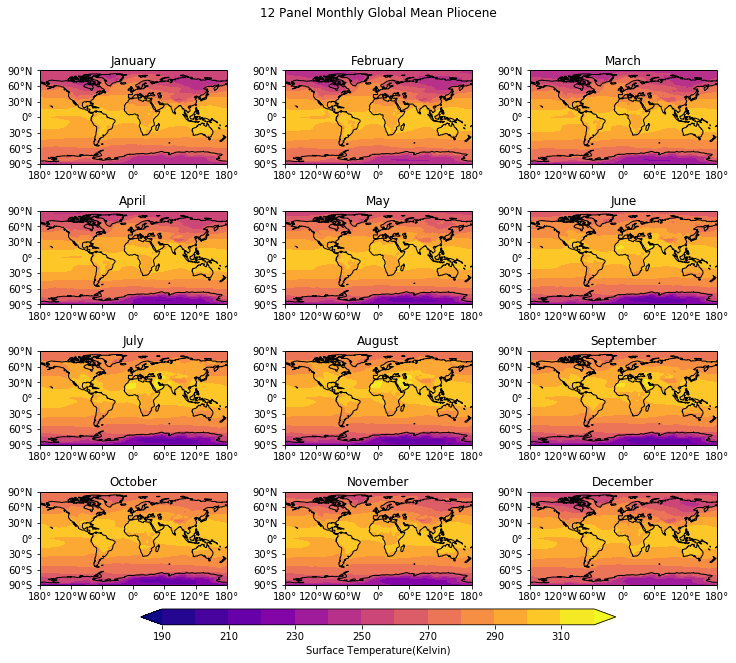

In [205]:
clevs=np.arange(190,330,10)


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,month in enumerate(pan_model['month']):
        # Select the season
        data=pan_model.sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=pan_model['lon'])
        

        # Contour plot
        cs=axs[i].contourf(lons,pan_model['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='plasma',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        cellmonth=['January','February','March','April','May','June','July','August','September','October','November','December']
#for j in range(0,12):
        #plt.title(cellmonth[i])
        axs[i].set_title(cellmonth[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Surface Temperature(Kelvin)')

# Add a big title at the top
plt.suptitle('12 Panel Monthly Global Mean Pliocene')
plt.savefig("12_Panel_Monthly_GlobalMean_Pliocene.png")

Control

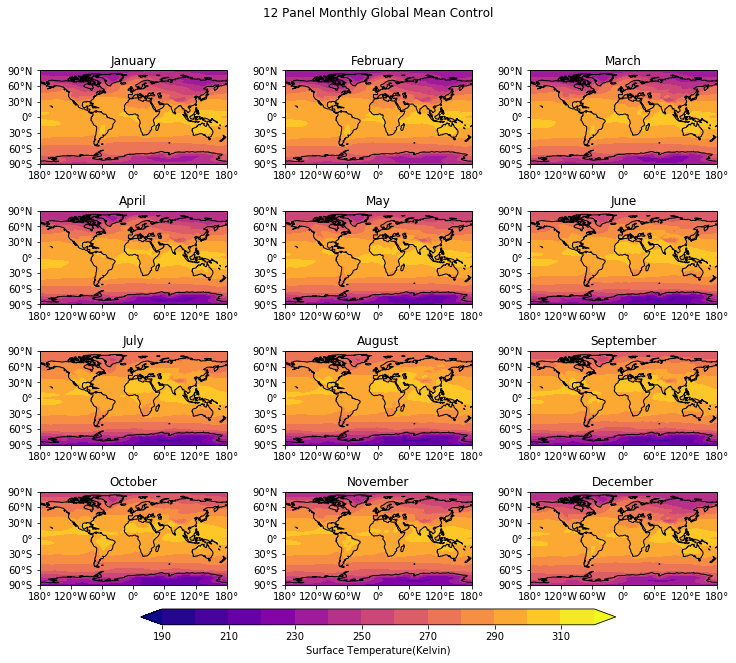

In [206]:
clevs=np.arange(190,330,10)


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,month in enumerate(pan_control['month']):
        # Select the season
        data=pan_control.sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=pan_control['lon'])
        

        # Contour plot
        cs=axs[i].contourf(lons,pan_control['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='plasma',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        cellmonth=['January','February','March','April','May','June','July','August','September','October','November','December']
#for j in range(0,12):
        #plt.title(cellmonth[i])
        axs[i].set_title(cellmonth[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Surface Temperature(Kelvin)')

# Add a big title at the top
plt.suptitle('12 Panel Monthly Global Mean Control')
plt.savefig("12_Panel_Monthly_GlobalMean_Control.png")

Panel Difference

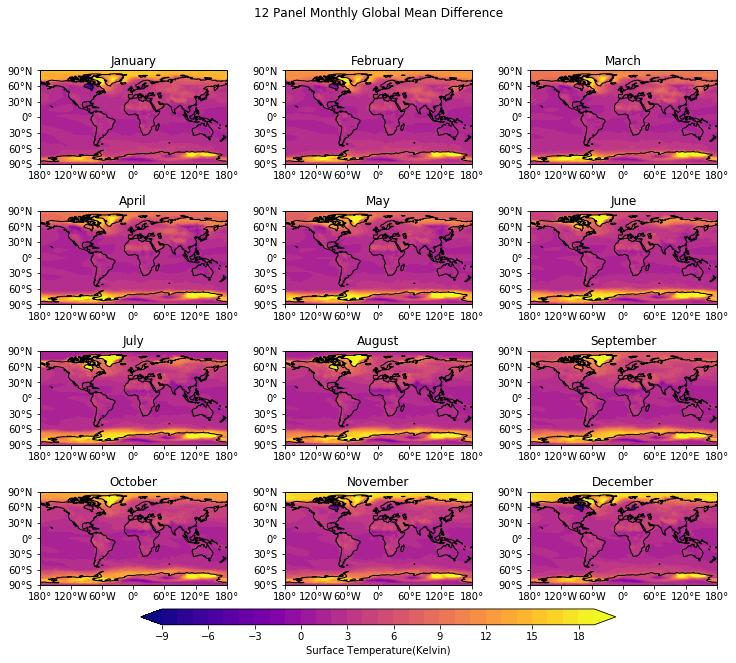

In [207]:
clevs=np.arange(-9,20,1)



# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,month in enumerate(pan_diff['month']):
        # Select the season
        data=pan_diff.sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=pan_diff['lon'])
        

        # Contour plot
        cs=axs[i].contourf(lons,pan_diff['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='plasma',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        cellmonth=['January','February','March','April','May','June','July','August','September','October','November','December']
#for j in range(0,12):
        #plt.title(cellmonth[i])
        axs[i].set_title(cellmonth[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Surface Temperature(Kelvin)')

# Add a big title at the top
plt.suptitle('12 Panel Monthly Global Mean Difference')
plt.savefig("12_Panel_Monthly_GlobalMean_Difference.png")

## Calculate the Global Mean Surface Temperature Change Line Plots

In [23]:
ds_anoms=model-control
#ds_anoms.model

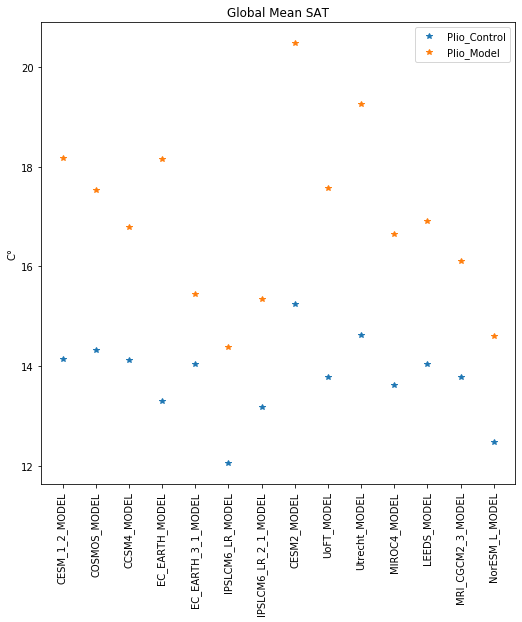

In [208]:
fig = plt.figure(figsize=(8.5,8.5))
plt.title("Global Mean SAT")
plt.plot(control-273.15,'*',label='Plio_Control')
plt.plot(PlioMIP2_TS['model'],model-273.15,'*',label='Plio_Model')
plt.legend()
plt.ylabel("C\N{DEGREE SIGN}")
plt.xticks(PlioMIP2_TS['model'],xticlab,rotation=90);
plt.savefig('Global_Mean_SAT_SCATTER.png')

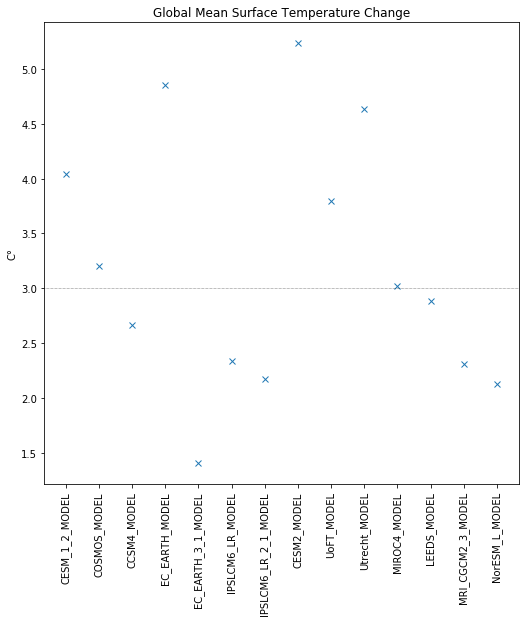

In [209]:
fig = plt.figure(figsize=(8.5,8.5))
plt.title("Global Mean Surface Temperature Change")
plt.plot(PlioMIP2_TS['model'],ds_anoms,'x',label='Plio_Model')
plt.xticks(rotation=90)
plt.ylabel("C\N{DEGREE SIGN}")
plt.xticks(PlioMIP2_TS['model'],xticlab,rotation=90);
plt.axhline(3,color='black',linewidth=0.5,linestyle='dotted')
plt.savefig('Global_Mean_tempchange_scatter.png')

# Multi Model Mean

In [169]:
multi=PlioMIP2_TS.Plio_TS.mean(dim=("model", "month"))-PlioMIP2_TS.PI_TS.mean(dim=("model", "month"))

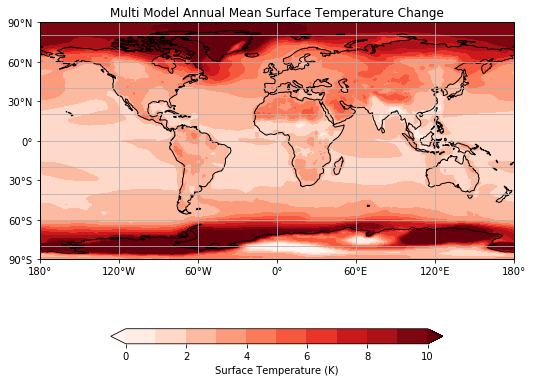

In [210]:
# Make the figure larger
fig = plt.figure(figsize=(8.5,8.5))

clevs=np.arange(0,11,1)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=multi
data, lons = add_cyclic_point(data, coord=multi['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, multi['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (K)')

# Add title
plt.title('Multi Model Annual Mean Surface Temperature Change')# Pliocene - Control or Temp Change
plt.savefig('Multi_model_ann_mean_SurTemp.png')

#Composites 

# Defining Global Mean Surface Temperature High and Low Anoms Threshold

In [177]:
idx_high=PlioMIP2_TS.model.values[np.where(ds_anoms.values>=3)[0]]
idx_low=PlioMIP2_TS.model.values[np.where(ds_anoms.values<=3)[0]]

In [178]:
#print(idx_high)

In [179]:
high=PlioMIP2_TS.sel(model=idx_high)
high=high.mean(dim=("model", "month"))

low=PlioMIP2_TS.sel(model=idx_low)
low=low.mean(dim=("model", "month"))

In [180]:
print(high)
print(low)

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    Plio_TS  (lat, lon) float64 230.7 230.7 230.7 230.7 ... 264.6 264.6 264.6
    PI_TS    (lat, lon) float64 226.0 226.1 226.1 226.1 ... 252.6 252.6 252.6
<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    Plio_TS  (lat, lon) float64 229.9 229.9 229.9 229.9 ... 260.1 260.1 260.1
    PI_TS    (lat, lon) float64 227.4 227.4 227.4 227.4 ... 252.6 252.6 252.6


Composite of Mean Surface Temperature Change (HIGH)

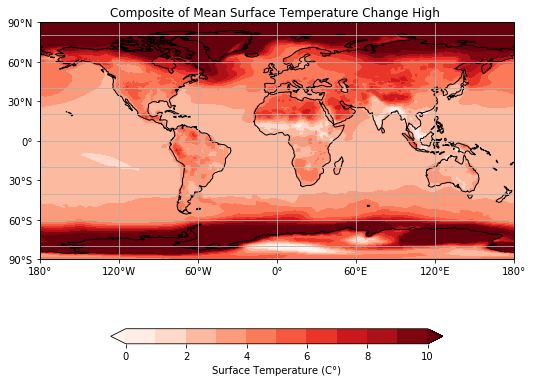

In [211]:
# Make the figure larger
fig = plt.figure(figsize=(8.5,8.5))

clevs=np.arange(0,11,1)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=high.Plio_TS-high.PI_TS
data, lons = add_cyclic_point(data, coord=high['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, high['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperature Change High ')
plt.savefig('CompGlobalmean_surf_temp_high.png')

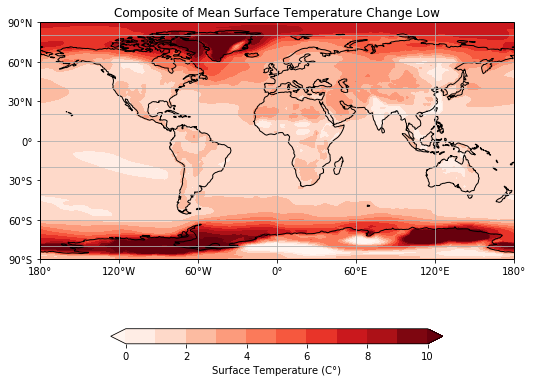

In [212]:
# Make the figure larger
fig = plt.figure(figsize=(8.5,8.5))

clevs=np.arange(0,11,1)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=low.Plio_TS-low.PI_TS
data, lons = add_cyclic_point(data, coord=low['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, low['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperature Change Low')
plt.savefig('CompGlobalmean_surf_temp_low.png')

Composite of Mean Surface Temperature Change Difference (high-low)

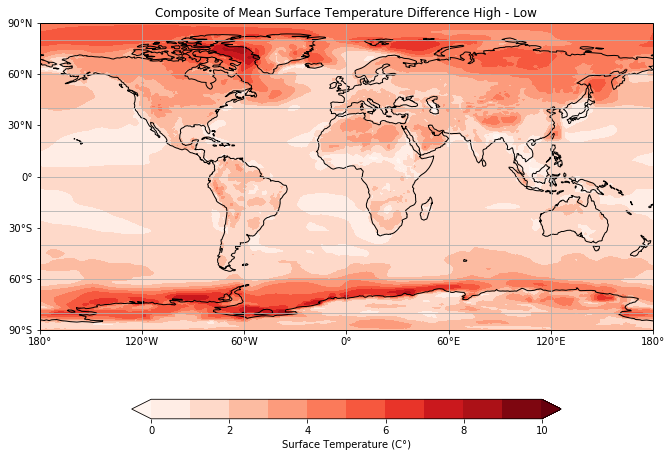

In [213]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

clevs=np.arange(0,11,1)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=(high.Plio_TS-high.PI_TS)-(low.Plio_TS-low.PI_TS)
data, lons = add_cyclic_point(data, coord=low['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, low['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperature Difference High - Low')
plt.savefig('CompGlobalmean_surf_temp_diff.png')

Composite of Mean Surface Temperatures Difference Weighted

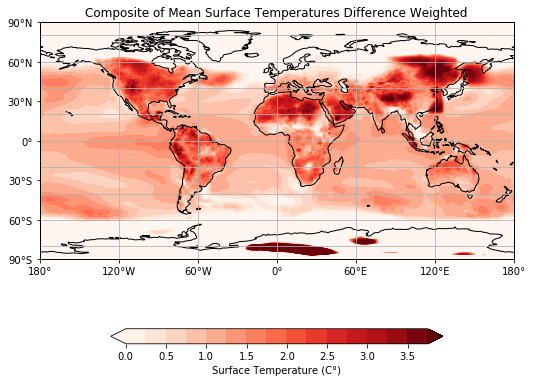

In [215]:
# Make the figure larger
fig = plt.figure(figsize=(8.5,8.5))

clevs=np.arange(0,4,0.25)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=(high.Plio_TS-high.PI_TS)-(low.Plio_TS-low.PI_TS)/weights_m
data, lons = add_cyclic_point(data, coord=low['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, low['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperatures Difference Weighted')
plt.savefig('CompGlobalmean_surf_temp_diff_weight.png')

In [192]:
from scipy.stats import linregress

In [193]:
anoms=PlioMIP2_TS.Plio_TS.mean(dim=("month"))-PlioMIP2_TS.PI_TS.mean(dim=("month"))

In [194]:
nx=len(anoms['lon'])
ny=len(anoms['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))
m_array=np.zeros((ny,nx))

x=model

for i in range(nx):
    for j in range(ny):
        

        y=anoms[:,j,i]
        
        m,b,r,p,e = linregress(x,y)
        
        m_array[j,i]=m
        r_array[j,i]=r
        p_array[j,i]=p
        

In [195]:
mask_sig=np.where(p_array<0.05,m_array,np.nan)

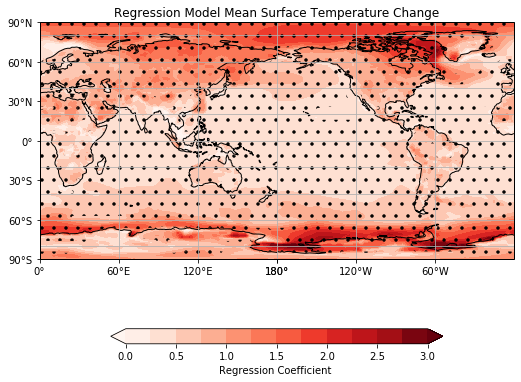

In [216]:
clevs=np.arange(0,3.25,0.25)

fig = plt.figure(figsize=(8.5,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=anoms['lon'])
mask_data,lons=add_cyclic_point(mask_sig,coord=anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='Reds',extend='both')

ax.contourf(lon,anoms['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient ')

# Add title
plt.title('Regression Model Mean Surface Temperature Change')
plt.savefig('Regression_Model_Mean_SurfaceTemperature_Change.png')

Correlation

In [217]:
r_map=xr.corr(model,anoms,dim="model")
r_map

<xarray.DataArray (lat: 181, lon: 360)>
array([[0.62246535, 0.60903229, 0.60754434, ..., 0.59160046, 0.59387492,
        0.5979095 ],
       [0.710037  , 0.71010138, 0.70731318, ..., 0.71582863, 0.71533546,
        0.71303463],
       [0.75566512, 0.75524221, 0.74724574, ..., 0.75084446, 0.75209082,
        0.75458301],
       ...,
       [0.67606952, 0.67529712, 0.6745253 , ..., 0.67741082, 0.67696951,
        0.67652803],
       [0.68292727, 0.68246799, 0.68200406, ..., 0.68435414, 0.68387667,
        0.68340115],
       [0.69871477, 0.69871477, 0.69871477, ..., 0.69871477, 0.69871477,
        0.69871477]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0

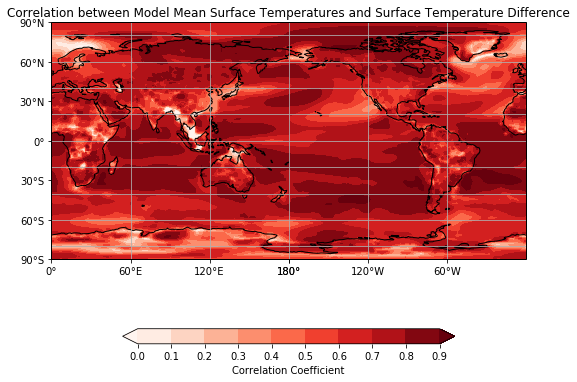

In [218]:
#clevs=np.arange(-1,1.1,0.1)
clevs=np.arange(0,1,0.1)

fig = plt.figure(figsize=(8.5,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=r_map
data,lon=add_cyclic_point(r_map,coord=anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='Reds',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

#label_latlon(ax,np.arange(-180,181,60),np.arange(-90,91,30))
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Model Mean Surface Temperatures and Surface Temperature Difference')
plt.savefig('Correlation_between_ModelMean_SurfaceTemperatures.png')

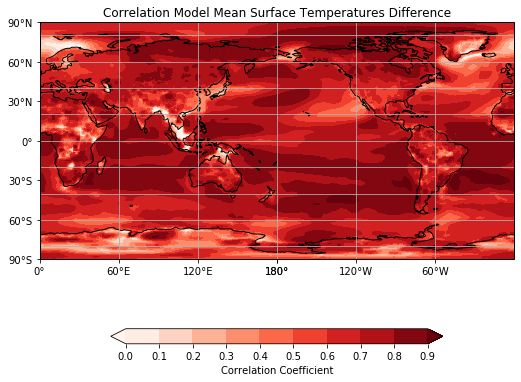

In [219]:
#clevs=np.arange(-1,1.1,0.1)
clevs=np.arange(0,1,0.1)

fig = plt.figure(figsize=(8.5,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=r_map
data,lon=add_cyclic_point(r_map,coord=anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='Reds',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

#label_latlon(ax,np.arange(-180,181,60),np.arange(-90,91,30))
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation Model Mean Surface Temperatures Difference')
plt.savefig('Correlation_ModelMean_SurfaceTemperatures_Difference.png')

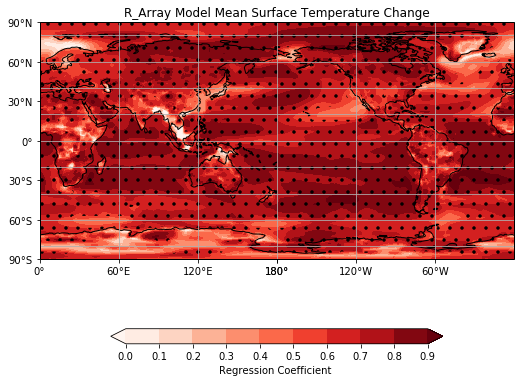

In [220]:
clevs=np.arange(0,1,0.1)

fig = plt.figure(figsize=(8.5,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=r_array
data,lon=add_cyclic_point(data,coord=anoms['lon'])
mask_data,lons=add_cyclic_point(mask_sig,coord=anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='Reds',extend='both')

ax.contourf(lon,anoms['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient ')

# Add title
plt.title('R_Array Model Mean Surface Temperature Change')
plt.savefig('R_Array_ModelMean_Surface Temperature.png')